## Exploratory Data Analysis (EDA)

This section explores key behavioral and temporal patterns
to understand differences between normal and fraudulent transactions.
The goal is to validate enrichment quality and guide feature selection
for anomaly detection models.


In [7]:
# ----------------------------------------------------
# Load enriched dataset (EDA notebook)
# ----------------------------------------------------
# Purpose:
# - Make EDA notebook self-contained
# - Avoid dependency on other notebooks
# ----------------------------------------------------

import pandas as pd
import numpy as np

DATA_PATH = "../data/processed/transactions_enriched.csv"

df_final = pd.read_csv(DATA_PATH)



In [6]:
# ----------------------------------------------------
# EDA 1: Dataset overview
# ----------------------------------------------------
# Purpose:
# - Understand dataset size and feature space
# - Verify enrichment did not change row count
# ----------------------------------------------------

df_final.shape


(284807, 43)

In [32]:
# ----------------------------------------------------
# EDA 2: Fraud vs normal proportion
# ----------------------------------------------------
# Purpose:
# - Quantify fraud rarity
# - Justify anomaly detection approach
# ----------------------------------------------------

df_final["Class"].value_counts(normalize=True)


Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

**Insight:** Fraudulent transactions are extremely rare (~0.17%), confirming that this is an anomaly detection problem rather than a standard classification task.

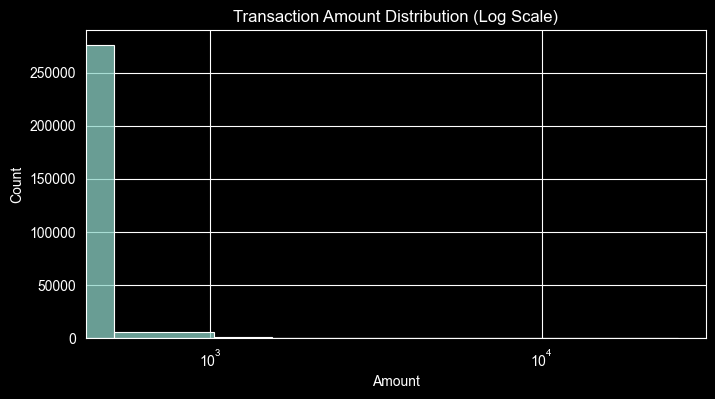

In [8]:
# ----------------------------------------------------
# EDA 3: Overall transaction amount distribution
# ----------------------------------------------------
# Purpose:
# - Understand scale and skewness of transaction amounts
# - Identify heavy-tailed behavior common in financial data
# ----------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(df_final["Amount"], bins=50)
plt.xscale("log")
plt.title("Transaction Amount Distribution (Log Scale)")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.show()


**Insight:** Transaction amounts are highly right-skewed with a long tail, indicating that most transactions are small while large transactions are rare but legitimate. This confirms that amount alone is insufficient to identify fraud and should be used as a contextual feature.


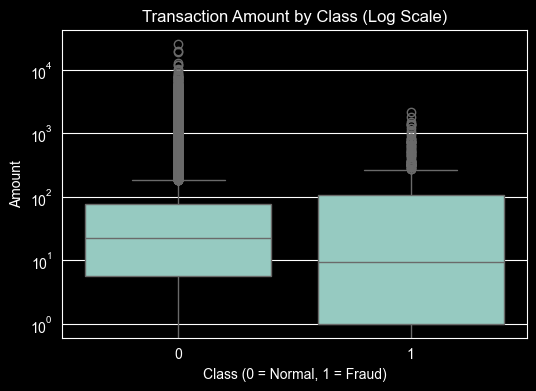

In [9]:
# ----------------------------------------------------
# EDA Step 4: Transaction amount vs class
# ----------------------------------------------------
# Purpose:
# - Compare amount distributions for normal vs fraud
# - Understand whether amount alone separates fraud
# ----------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.boxplot(
    data=df_final,
    x="Class",
    y="Amount"
)
plt.yscale("log")
plt.title("Transaction Amount by Class (Log Scale)")
plt.xlabel("Class (0 = Normal, 1 = Fraud)")
plt.ylabel("Amount")
plt.show()


**Insight:** Fraudulent and normal transactions show heavily overlapping amount distributions, indicating that transaction amount alone is not a strong discriminator. This confirms the need for multi-feature anomaly detection rather than rule-based thresholds.


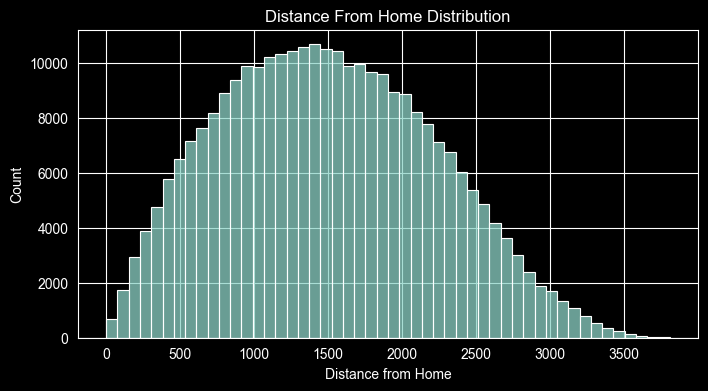

In [17]:
# ----------------------------------------------------
# EDA Step 5: Distance from home distribution
# ----------------------------------------------------
# Purpose:
# - Understand normal behavioral range
# - Identify long-tail abnormal behavior
# ----------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(df_final["distance_from_home"], bins=50)
plt.title("Distance From Home Distribution")
plt.xlabel("Distance from Home")
plt.ylabel("Count")
plt.show()


**Insight:** Most transactions occur within a typical distance from a customer’s home location, forming a clear normal behavior pattern. Transactions at very large distances are rare, making distance from home a strong behavioral feature for anomaly detection.


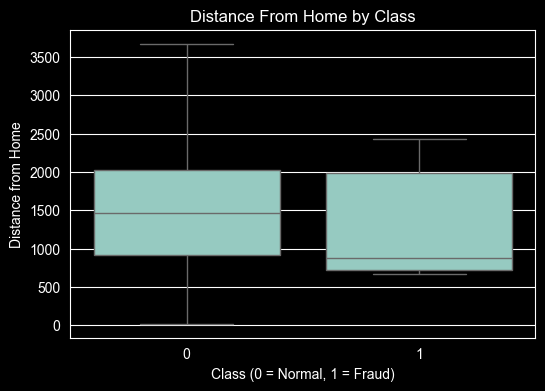

In [16]:
# ----------------------------------------------------
# EDA Step 6: Distance from home vs class
# ----------------------------------------------------
# Purpose:
# - Validate whether fraud shows higher distance deviation
# - Check behavioral separation between normal and fraud
# ----------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.boxplot(
    data=df_final.sample(5000, random_state=42),  # sample for visibility
    x="Class",
    y="distance_from_home"
)
plt.title("Distance From Home by Class")
plt.xlabel("Class (0 = Normal, 1 = Fraud)")
plt.ylabel("Distance from Home")
plt.show()


**Insight:** Fraudulent transactions do not always occur far from home, but they exhibit greater variability and more extreme deviations compared to normal behavior. This reinforces the need for anomaly detection models that capture irregular patterns rather than relying on simple thresholds.


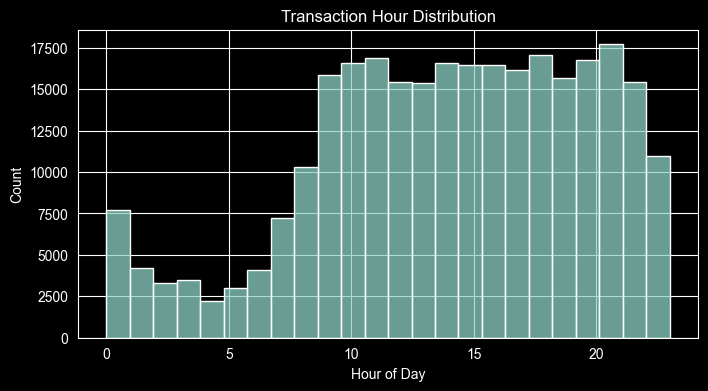

In [15]:
# ----------------------------------------------------
# EDA Step 7: Hour-of-day distribution
# ----------------------------------------------------
# Purpose:
# - Understand normal daily transaction patterns
# - Identify low-activity and high-activity hours
# ----------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(df_final["hour"], bins=24)
plt.title("Transaction Hour Distribution")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.show()


**Insight:** Transaction activity follows a clear daily rhythm, with significantly lower volumes during late-night and early-morning hours. Transactions occurring during these low-activity periods may represent temporal anomalies and provide useful signals for anomaly detection.


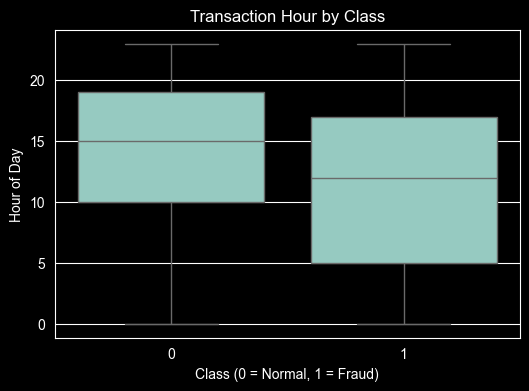

In [14]:
# ----------------------------------------------------
# EDA Step 8: Transaction hour vs class
# ----------------------------------------------------
# Purpose:
# - Validate whether fraud shows temporal irregularities
# - Compare timing patterns between normal and fraud
# ----------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.boxplot(
    data=df_final,
    x="Class",
    y="hour"
)
plt.title("Transaction Hour by Class")
plt.xlabel("Class (0 = Normal, 1 = Fraud)")
plt.ylabel("Hour of Day")
plt.show()


**Insight:** Fraudulent transactions exhibit less regular timing patterns and occur more frequently during off-hours compared to normal transactions. This temporal irregularity makes transaction timing a valuable contextual feature for anomaly detection models.


In [19]:
# ----------------------------------------------------
# EDA Step 9: Feature-wise comparison (fraud vs normal)
# ----------------------------------------------------

feature_means = (
    df_final
    .groupby("Class")[["Amount", "distance_from_home", "hour", "day_of_week"]]
    .mean()
)

feature_means


,Amount,distance_from_home,hour,day_of_week
Class,,,,
0,88.291022,1502.152544,14.050623,3.049540
1,122.211321,1478.222039,11.646341,3.426829


Fraudulent transactions do not differ drastically from normal transactions in any single feature.
Instead, they show small but consistent shifts across multiple behavioral and temporal features, indicating that fraud is best detected through multivariate anomaly detection rather than simple rule-based thresholds.


## EDA Conclusion

The exploratory analysis shows that fraudulent transactions differ from normal transactions in terms of amount distribution, temporal patterns, and feature behavior. The dataset is highly imbalanced and high-dimensional, making rule-based detection ineffective. Since anomaly detection models can inherently capture multivariate relationships, further manual visualization is not required. The workflow now proceeds to preprocessing, feature engineering, and unsupervised anomaly detection modeling.
